In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
import numpy as np

In [21]:
inputfile = "member.uid___A001_X2d20_X39ab.Cloverleaf_sci.spw25.cube.I.pbcor.fits-Z-profile-Region_1-Statistic_Mean-Coordinate_Current-2025-07-07-16-51-00.tsv"
df = pd.read_csv(inputfile, sep="\t", skiprows=5)

In [22]:
df.columns = [col.strip().lstrip("#").strip() for col in df.columns]

df[df.columns[0]] = pd.to_numeric(df[df.columns[0]], errors="coerce")
df[df.columns[1]] = pd.to_numeric(df[df.columns[1]], errors="coerce")

x = df[df.columns[0]]
y = df[df.columns[1]] *1000 # Convert to mJy/beam

df = df.dropna()

In [34]:
my_lines = [
    (97.18831, "CO v=0")
    #,(96.369, "CS v=0")
]

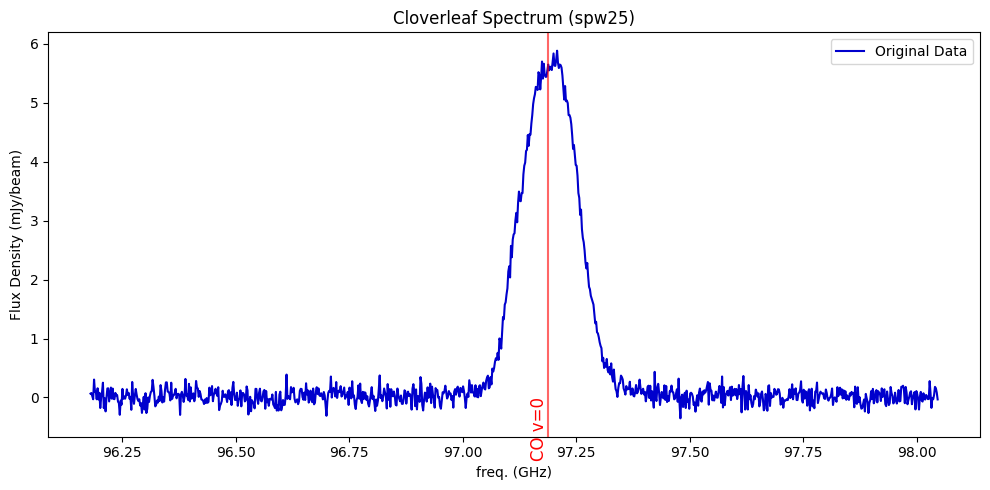

In [35]:
#沒平滑過的
plt.figure(figsize=(10, 5))
plt.plot(x, y, label="Original Data", color="mediumblue")
for freq, label in my_lines:
    plt.axvline(freq, color="red", linestyle="-", alpha=0.6)
    plt.text(freq, max(df[df.columns[1]])*0.9, label, rotation=90, color="red", fontsize=12, ha='right', va='top')
plt.xlabel("freq. (GHz)")
plt.ylabel("Flux Density (mJy/beam)")
plt.title("Cloverleaf Spectrum (spw25)")
plt.grid(False)
plt.legend()      
plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_46724\86726201.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limited[df.columns[1]] = df_limited[df.columns[1]] * 1000  # Convert to mJy/beam


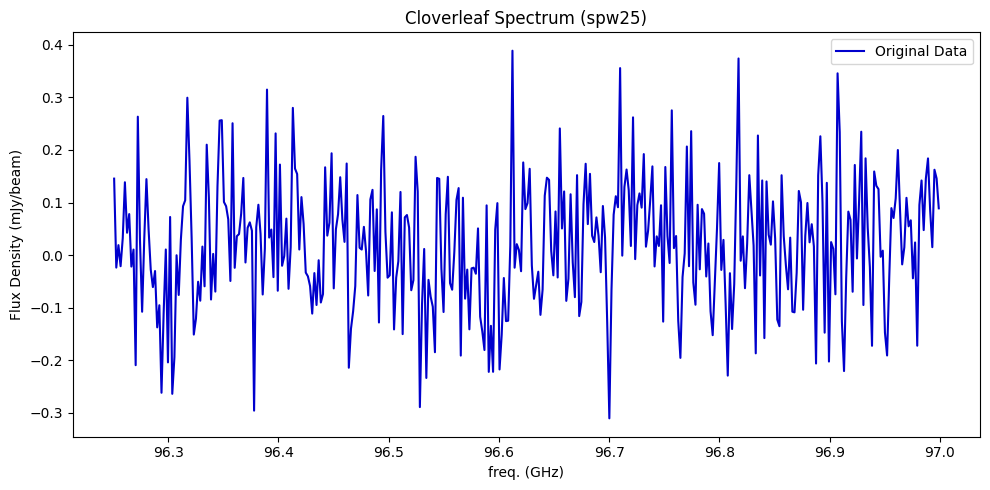

In [40]:
plt.figure(figsize=(10, 5))

mask = (df[df.columns[0]] > 96.25) & (df[df.columns[0]] < 97)
df_limited = df[mask]

df_limited[df.columns[1]] = df_limited[df.columns[1]] * 1000  # Convert to mJy/beam

plt.plot(df_limited[df.columns[0]], df_limited[df.columns[1]],
         label="Original Data", color="mediumblue")

    
for freq, label in my_lines:
    if freq <= 97:
        plt.axvline(freq, color="red", linestyle="-", alpha=0.6)
        plt.text(freq, max(df_limited[df.columns[1]])*0.9, label, rotation=90, color="red", fontsize=12, ha='right', va='top')


plt.xlabel("freq. (GHz)")
plt.ylabel("Flux Density (mJy/beam)")
plt.title("Cloverleaf Spectrum (spw25)")
plt.grid(False)
plt.legend()
plt.tight_layout()
plt.show()

### 先用boxcar

In [44]:
def boxcar_smooth(y, kernel_size):
    kernel = np.ones(kernel_size) / kernel_size
    return np.convolve(y, kernel, mode="same")

y_boxcar = boxcar_smooth(y, kernel_size=5)

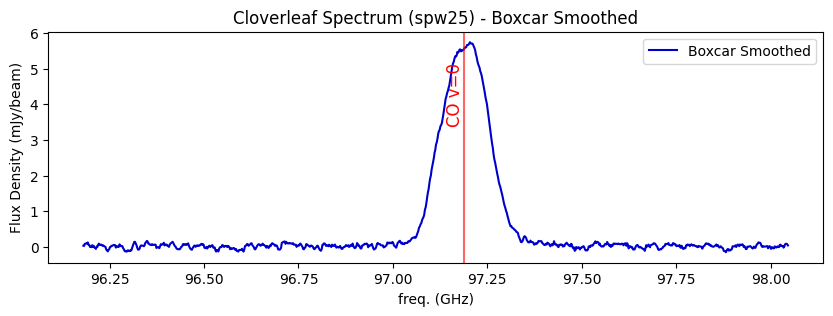

In [46]:
plt.figure(figsize=(10, 3))
plt.plot(x, y_boxcar, label="Boxcar Smoothed", color="mediumblue")
for freq, label in my_lines:
    if freq >= 97:
        plt.axvline(freq, color="red", linestyle="-", alpha=0.6)
        plt.text(freq, max(y_boxcar)*0.9, label, rotation=90, color="red", fontsize=12, ha='right', va='top')
plt.xlabel("freq. (GHz)")
plt.ylabel("Flux Density (mJy/beam)")
plt.title("Cloverleaf Spectrum (spw25) - Boxcar Smoothed")
plt.grid(False)
plt.legend()

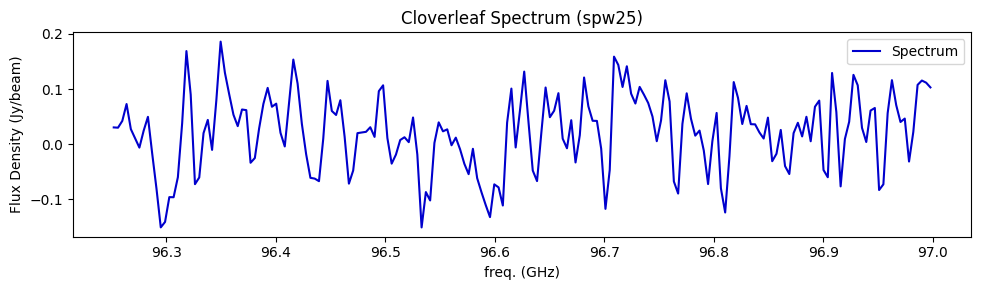

In [ ]:
#boxcar不夠用
#先加入binning

def rebin_spectrum(x, y, bin_size):
    n_bins = len(y) // bin_size
    x = x[:n_bins * bin_size]
    y = y[:n_bins * bin_size]
    x_binned = x.reshape(n_bins, bin_size).mean(axis=1)
    y_binned = y.reshape(n_bins, bin_size).mean(axis=1)
    return x_binned, y_binned



########################################################
#定義顯示的位置
mask = (df[df.columns[0]] > 96.25) & (df[df.columns[0]] < 97)
df_limited = df[mask]

x_binned, y_binned = rebin_spectrum(df_limited[df.columns[0]].values, df_limited[df.columns[1]].values, bin_size=2)
y_binned_boxcar = boxcar_smooth(y_binned, kernel_size=2) * 1000  # Convert to mJy/beam

#建立一個新的DataFrame
df_limited_smoothed = pd.DataFrame({df.columns[0]: x_binned, df.columns[1]: y_binned_boxcar})


plt.figure(figsize=(10, 3))
plt.plot(df_limited_smoothed[df.columns[0]], df_limited_smoothed[df.columns[1]],
         label="Spectrum", color="mediumblue")
#for freq, label in my_lines:
#   if freq <= 97:
#        plt.axvline(freq, color="red", linestyle="-", alpha=0.6)
#        plt.text(freq, max(df_limited[df.columns[1]])*0.9, label, rotation=90, color="red", fontsize=12, ha='right', va='top')


plt.xlabel("freq. (GHz)")
plt.ylabel("Flux Density (mJy/beam)")
plt.title("Cloverleaf Spectrum (spw25)")
plt.grid(False)
plt.legend()
plt.tight_layout()
plt.show()